# Deep Learning: Computer Vision with Pre-train Model
> AHSNCCU/NTNU CSIE 王修佑

+ 探索可用模型👉 [NGC](https://ngc.nvidia.com/catalog/models)
+ GitHub
+ Google Search

## Practice: 自動化狗門

+ 影像分類模型👉 [ImageNet 挑戰](https://en.wikipedia.org/wiki/ImageNet#History_of_the_ImageNet_challenge)
+ 經過大型dataset訓練
+ 大多針對貓狗動物
+ 1000類別


## 載入模型

從Keras載入[ImageNet模型](https://keras.io/api/applications/#available-models)
首先我們要下載模型。經過訓練的 ImageNet 模型可以直接在 Keras 函式庫中下載。

+ [VGG16](https://keras.io/api/applications/vgg/)

In [1]:
from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

注意Input Layer & Output Layer是否符合我們的維度需求！

In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### 輸入維度
圖像格式: (224, 224, 3)  
單張輸入格式: (1, 224, 224, 3)

### 輸出維度
Output Layer的shape為 1000👉class數量。  
[ImageNet類別](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)

+ 狗的範圍為類別 151 到 268
+ 貓的範圍為類別 281 到 285

## 載入影像

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(1200, 1800, 3)


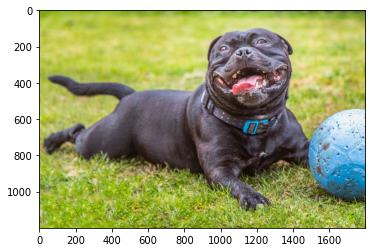

In [5]:
show_image("doggy_door_images/happy_dog.jpg")

## 預先處理影像

影像的最終形狀必須是 (1, 224, 224, 3)
+ Keras[`preprocess_input`方法](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)。

In [6]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [7]:
processed_image = load_and_process_image("doggy_door_images/brown_bear.jpg")

Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


## 進行預測

In [8]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

用幾種動物試試看，然後看看結果如何！也歡迎你上傳自己的影像並分類，看看模型的表現有多好。

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 1us/step
Predicted: [[('n02093256', 'Staffordshire_bullterrier', 0.4509502), ('n02110958', 'pug', 0.32263014), ('n02099712', 'Labrador_retriever', 0.09343313)]]


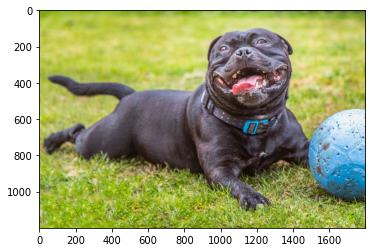

In [9]:
readable_prediction("doggy_door_images/happy_dog.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 187ms/step
Predicted: [[('n02132136', 'brown_bear', 0.9853865), ('n02133161', 'American_black_bear', 0.013876298), ('n02410509', 'bison', 0.00026586157)]]


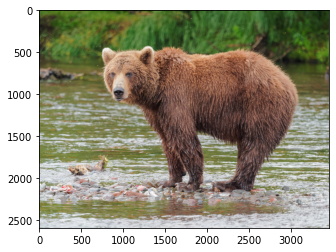

In [10]:
readable_prediction("doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 177ms/step
Predicted: [[('n02123159', 'tiger_cat', 0.7366057), ('n02124075', 'Egyptian_cat', 0.17488629), ('n02123045', 'tabby', 0.04588379)]]


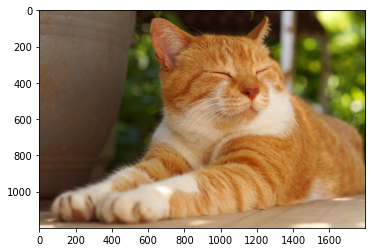

In [11]:
readable_prediction("doggy_door_images/sleepy_cat.jpg")

## 僅限狗

+ 狗的範圍是類別 151 至 268
+ 貓的範圍是類別 281 至 285
+ 運用 [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

In [12]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 202ms/step
You're not a dog! Stay outside!


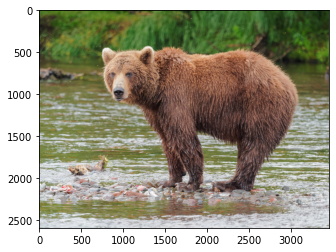

In [13]:
doggy_door("doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 168ms/step
Doggy come on in!


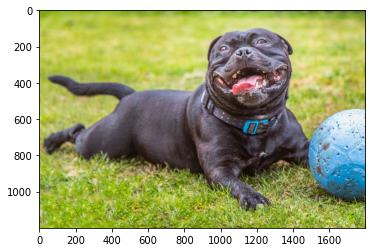

In [14]:
doggy_door("doggy_door_images/happy_dog.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 154ms/step
Kitty stay inside!


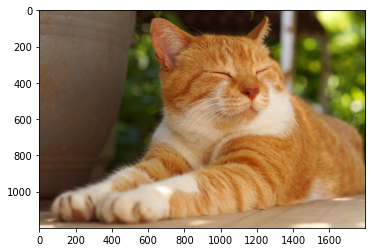

In [15]:
doggy_door("doggy_door_images/sleepy_cat.jpg")

### 清除記憶體

In [16]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}